In [1]:
import numpy as np
from math import sqrt
import pandas as pd
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile
from evaluacion_funciones import *

/var/folders/m7/bn7r1sg94s539hr0hp_6s2_h0000gn/T/ipykernel_37575/4282179713.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Carga de datos.
datos = pd.read_csv('data/boston.csv', sep="\s+", skiprows=22, header=None)
X = np.hstack([datos.values[::2, :], datos.values[1::2, :2]])
y = datos.values[1::2, 2]
print(np.shape(X))

(242, 16)


In [3]:
# Métricas de evaluación.
metricas = {
  'MAE':  metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2':   metrics.r2_score}

In [4]:
# Construcción de los algoritmos de aprendizaje.
k = 10
base = 'KNN' + str(k)
algoritmos = {}

In [5]:
# Algoritmo 1: KNN
algoritmos[base] = KNeighborsRegressor(n_neighbors = k)

In [6]:
# Algoritmo 2: Estandarización + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+'+base] = Pipeline(pasos)

In [7]:
# Algoritmo 3: Estandarización + Selección atributos + KNN
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression, percentile=10)),
         ('reg', algoritmos['KNN'+str(k)])]
algoritmos['Est+SelAtr+'+base] = Pipeline(pasos)

In [8]:
# Algoritmo 4: Estandarización + Selecc. atributos + KNN(p=1)
pasos = [('estandarizacion', StandardScaler()),
         ('selatr', SelectPercentile(score_func=f_regression,
           percentile=10)),
         ('reg', KNeighborsRegressor(n_neighbors = k, p=1))]
algoritmos['Est+SelAtr+'+base+'(p=1)'] = Pipeline(pasos)

In [9]:
# Validación y obtención de las predicciones del modelo.
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X, y, cv=KFold(n_splits=10, shuffle=True,random_state=42))

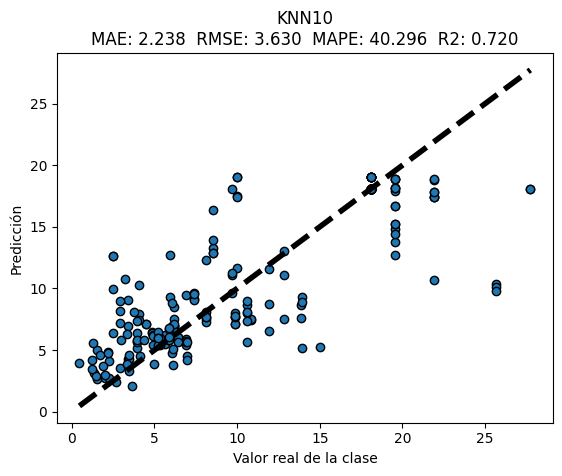

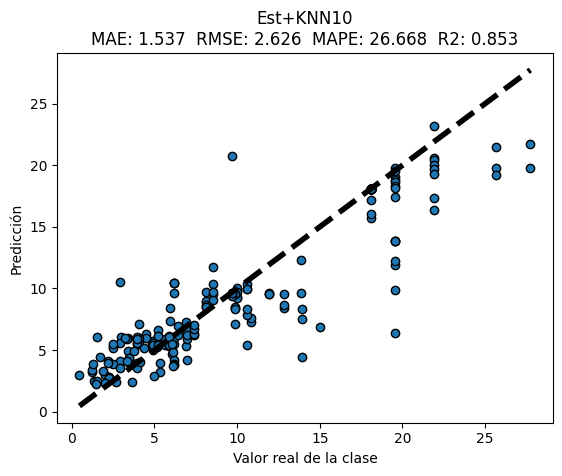

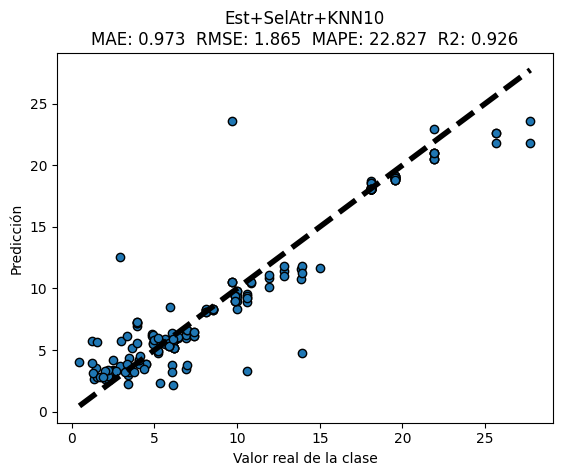

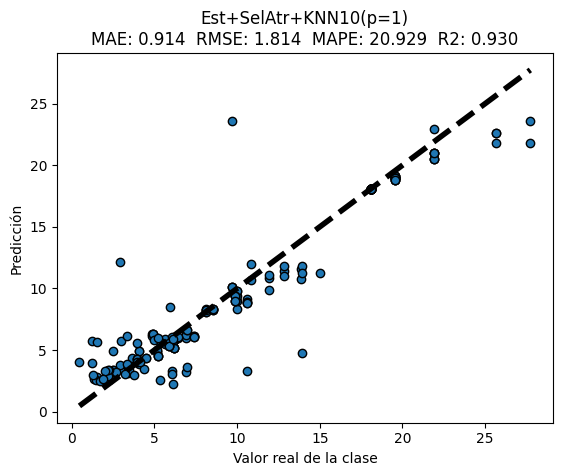

In [10]:
# Evaluación y presentación de resultados.
for nombre, alg in algoritmos.items():
    results = evaluacion(y, y_pred[nombre], metricas)
    grafica_real_vs_pred(y, y_pred[nombre], results, nombre)